## HAND WRITTEN DIGIT RECOGNITION-Assignment


The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

Objective : We are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. 
Thus, this is a 10-class classification problem.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale


## Data Understanding

In [2]:
digit= pd.read_csv(r'C:\Users\engel\Desktop\UpGrad\Predictive_analysis_II/Train.csv')

In [3]:
# About the dataset
print('Dimensions:', digit.shape,'\n')
print(digit.info())
digit.head()

Dimensions: (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Checking unique labels
order = list(np.sort(digit['label'].unique()))
order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
#Checking for missing values in the entire dataset
digit.isnull().sum().sum()

0

In [6]:
# Checking the basic statistics of all the columns
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
#Checking for presence of any outliers
digit_desc=digit.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,1])
digit_desc

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
20%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
30%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
40%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
60%,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


We see in the above ouptut there no outliers, hence no need of treating the outliers

In [8]:
# basic plots: How do various attributes vary with the digits


#sns.barplot(x='label', y='pixel12', data=digit, order=order)
#sns.countplot(digit)
help(sns.countplot)


Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or list 

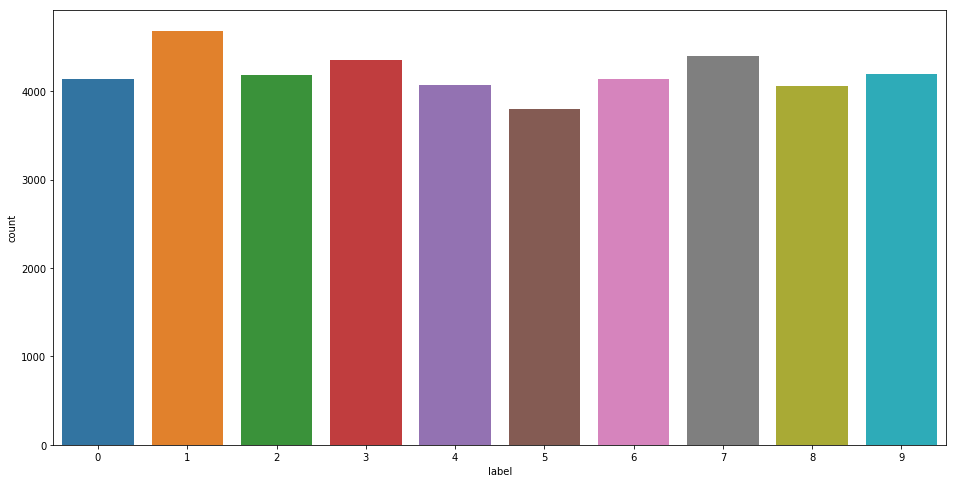

In [9]:
#Plotting the count of each labels in the entire dataset
plt.figure(figsize=(16, 8))
sns.countplot(x='label',data=digit)

In [10]:
# Splitting into 'x' and 'y'
x = digit.drop('label', axis=1)
y = digit['label']

In [11]:
# Scaling the columns
x_scaled = scale(x)

C:\Users\engel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


As train data is of 42000 rows and running gridsearch with K=5 cross validation would take hours for execution,
thus taking 20% sample from train dataset and 80% as test data.

In [12]:
# Splitting into 'train' and 'test'
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.2, test_size=0.8, random_state=100)

In [13]:
# Checking shape of train data
x_train.shape

(8400, 784)

In [14]:
# Checking shape of test data
x_test.shape

(33600, 784)

# Model building


In [15]:
# Linear model
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# Predict
y_pred = model_linear.predict(x_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
# Confusion matrix and accuracy

#1. Accuracy
print('accuracy:', metrics.accuracy_score(y_true=y_test, y_pred=y_pred), '\n')

#2. Confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

#3. Class accuracy
print(classification_report(y_true=y_test, y_pred=y_pred))

#Checking the precison and recall values
print("Precision Score :: ",metrics.precision_score(y_test,y_pred,pos_label='positive',average='micro'),"\n")

print("Recall Score :: ",metrics.recall_score(y_test,y_pred,pos_label='positive',average='micro'),"\n")


accuracy: 0.9106845238095238 

[[3194    0   23    6   10   21   25    2    9    0]
 [   0 3669   21   13    3    5    1    6   26    4]
 [  44   24 3005   85   44   10   32   26   50   12]
 [  20   18   95 3131    4  129    5   19   61   29]
 [  14   10   36    7 2996   12   19   14    7  129]
 [  29   19   27  145   32 2701   51    6   62   17]
 [  55   10   53    4   28   54 3071    0   10    0]
 [  10   28   40   31   66    3    1 3169    5  144]
 [  25   68   57  151   22  111   26   23 2733   25]
 [  23   10   23   33  160    7    0  153   24 2930]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3290
           1       0.95      0.98      0.97      3748
           2       0.89      0.90      0.90      3332
           3       0.87      0.89      0.88      3511
           4       0.89      0.92      0.91      3244
           5       0.88      0.87      0.88      3089
           6       0.95      0.93      0.94      3285
     

C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Above we see that linear model gives an accuracy of 91%. Lets check with non-linear model

In [18]:
help(metrics.accuracy_score)


Help on function accuracy_score in module sklearn.metrics.classification:

accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
   

In [19]:
# Non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fitting model
non_linear_model.fit(x_train,y_train )

#Predict
y_pred = non_linear_model.predict(x_test)

C:\Users\engel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# confusion matrix and accuracy

#1. Accuracy
print('accuracy:', metrics.accuracy_score(y_true=y_test, y_pred=y_pred), '\n')

#2. Confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

#3. Class accuracy
print(classification_report(y_true=y_test, y_pred=y_pred))

#4. Checking the precison and recall values
print("Precision Score :: ",metrics.precision_score(y_test,y_pred,pos_label='positive',average='micro'),"\n")

print("Recall Score :: ",metrics.recall_score(y_test,y_pred,pos_label='positive',average='micro'),"\n")


accuracy: 0.9340773809523809 

[[3199    0   32    2    3   13   28    1   12    0]
 [   0 3654   39   12    5    9    6    4   16    3]
 [  15    8 3190   21   22    2   16   22   29    7]
 [   5   14  123 3187    4   65    8   32   56   17]
 [   3    8   63    0 3029   10   18   13    7   93]
 [  12    7   47   82   17 2841   49    6   17   11]
 [  18    6   67    0   13   32 3140    0    9    0]
 [   1   26  117   11   21    3    1 3192    2  123]
 [  20   36   71   56   16   73   14   12 2918   25]
 [  14   12   64   38   56   10    1  109   24 3035]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3290
           1       0.97      0.97      0.97      3748
           2       0.84      0.96      0.89      3332
           3       0.93      0.91      0.92      3511
           4       0.95      0.93      0.94      3244
           5       0.93      0.92      0.92      3089
           6       0.96      0.96      0.96      3285
     

C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


We see above that the non-linear model accuracy (93.4%) than the liner_model (91%).Hence chosing hyperparameters corresponding to non-linear models

# Grid search: hyperparameter tuning
Tuning the model to find optimal values of 'C' and 'gamma' corresponding to an RBF kernel. Using 5-Fold cross validation


In [21]:
# creating KFold object with 5 splits

folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train) 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 36.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [23]:
# Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,171.349475,1.177637,21.557189,0.104083,1,0.01,"{'C': 1, 'gamma': 0.01}",0.738095,0.773810,0.754762,...,0.750952,0.013292,12,1.000000,0.999851,1.000000,0.999851,0.999851,0.999911,0.000073
1,41.929468,0.541165,12.421936,0.133198,1,0.001,"{'C': 1, 'gamma': 0.001}",0.934524,0.932738,0.942857,...,0.935238,0.003973,4,0.975298,0.974256,0.975000,0.974554,0.975446,0.974911,0.000447
2,62.164021,0.746276,17.193949,0.503456,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.904167,0.894643,0.912500,...,0.899167,0.008018,8,0.914732,0.917262,0.913244,0.914881,0.916220,0.915268,0.001372
3,176.948021,1.298124,22.040247,0.317788,10,0.01,"{'C': 10, 'gamma': 0.01}",0.752976,0.791667,0.773810,...,0.768095,0.014338,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,35.738320,0.477880,11.180703,0.199110,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.946429,0.951786,...,0.943690,0.006112,1,0.999405,0.999554,0.999554,0.999702,0.999702,0.999583,0.000111
5,28.041066,0.489403,10.578899,0.059815,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.928571,0.926190,0.936310,...,0.928571,0.005120,6,0.963095,0.964137,0.962202,0.964286,0.963839,0.963512,0.000773
6,179.928594,8.143637,21.917523,0.291809,100,0.01,"{'C': 100, 'gamma': 0.01}",0.752976,0.791667,0.773810,...,0.768095,0.014338,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,40.924681,3.662642,12.095749,0.450314,100,0.001,"{'C': 100, 'gamma': 0.001}",0.941071,0.945238,0.952976,...,0.943571,0.006633,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,22.230249,0.134727,8.932539,0.058176,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.932143,0.934524,0.936310,...,0.929048,0.007891,5,0.995387,0.996429,0.996131,0.996280,0.994048,0.995655,0.000880
9,136.536882,14.465045,13.848166,0.368960,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.752976,0.791667,0.773810,...,0.768095,0.014338,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


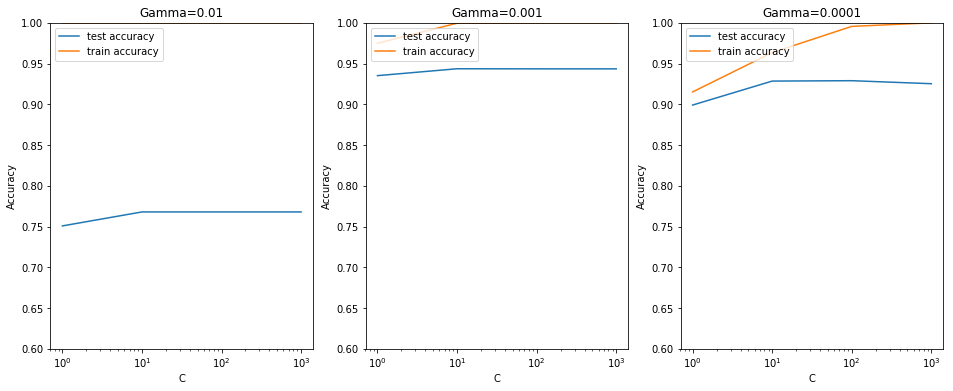

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

## plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


According to the plots above:
Non-linear models (high gamma) perform much better than the linear ones At any value of gamma, a high value of C leads to better performance None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other This suggests that the problem and the data is inherently non-linear in nature, and a complex model will outperform simple, linear models in this case.

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9436904761904762 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


# Building Model


In [28]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

print("Precision Score :: ",metrics.precision_score(y_test,y_pred,pos_label='positive',average='micro'))

print("Recall Score :: ",metrics.recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print(classification_report(y_true=y_test, y_pred=y_pred))



accuracy 0.9433928571428571 

[[3216    0   24    1    3   13   20    1   12    0]
 [   0 3666   33   10    5    3    5    6   16    4]
 [  14   13 3188   33   16    2   18   17   25    6]
 [   5    4   90 3249    3   52    9   22   58   19]
 [   6    8   49    0 3059    7   12   14    9   80]
 [   9    6   38   70   11 2869   47    6   19   14]
 [  26    3   56    1   14   29 3146    0   10    0]
 [   4   24   88   17   29    2    0 3268    4   61]
 [  16   19   59   61   17   65   13   10 2957   24]
 [  17    8   53   23   63    9    1   95   14 3080]] 

Precision Score ::  0.9433928571428571
Recall Score ::  0.9433928571428571
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3290
           1       0.98      0.98      0.98      3748
           2       0.87      0.96      0.91      3332
           3       0.94      0.93      0.93      3511
           4       0.95      0.94      0.95      3244
           5       0.94      0.93    

C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\engel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Conclusion:
The accuracy achieved using a non-linear kernel (0.943) is higher than that of a linear one (0.91). Hence, the problem is highly non-linear in nature.